# Folium
#### 지도데이터에 위치정보를 시각화하기 위한 라이브러리

In [1]:
import folium

#### folium.folium.Map(location, tiles, zoom_start ,,,,) : 지도 출력

In [2]:
map_osm=folium.Map(location=[37.566345, 126.977893])
map_osm

#### tiles 속성

In [3]:
map_osm=folium.Map(location=[37.566345, 126.977893], tiles="Stamen Terrain")
map_osm

In [4]:
map_osm=folium.Map(location=[37.566345, 126.977893], tiles='Stamen Toner')
map_osm

In [5]:
map_osm=folium.Map(location=[37.566345, 126.977893], tiles='Mapbox Bright')
map_osm

In [7]:
map_osm=folium.Map(location=[37.566345, 126.977893], zoom_start=8, tiles='Mapbox Control Room')
map_osm

In [9]:
map_osm=folium.Map(location=[37.566345, 126.977893], tiles='cartodbpositron')
map_osm

In [11]:
map_osm=folium.Map(location=[37.566345, 126.977893], tiles='cartodbdark_matter')
map_osm

#### folium.map.Marker(location, popup=None, icon=None)
- 지도 위에 마커 생성
- 생성한 포리움 객체에 .add_to()하면 marker가 생성됨

In [12]:
map_osm = folium.Map(location=[37.566345, 126.977893],zoom_start=17)
folium.Marker([37.566345, 126.977893], popup="덕수궁").add_to(map_osm)
map_osm

#### marker.Icon 인자
- marker의 색깔과 아이콘 등을 설정함

In [14]:
folium.Marker([37.5658859, 126.9754788], icon=folium.Icon(color="pink", icon="apple", prefix='fa')).add_to(map_osm)
map_osm

#### folium.CircleMarker(location, radius, color, fill_color)
- 원 marker를 그려줌

In [15]:
folium.CircleMarker([37.5658859, 126.9754788], radius=100, color="#3186cc", fill_color="#3186cc").add_to(map_osm)
map_osm

#### folium.choropleth(geo_data, data, columns, key_on, fill_color)
- geo_data : json파일
- data : geoJSON에 바인딩 할 데이터
- columns : 바인딩 할 데이터 열
- key_on : 데이터를 바인딩할 geo_data 파일의 변수 (반드시 feature로 시작해야댐)

In [17]:
import json
geo_path="C://Users/dcng/skorea_municipalities_geo_simple.json"
geo_str=json.load(open(geo_path, encoding='utf-8'))

In [18]:
map=folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="Stamen Toner")
map.choropleth(geo_data=geo_str)
map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# nltk (Natural Language Tool Kit)
#### 자연어 처리 및 문서 분석용 파이썬 패키지

In [13]:
import nltk
nltk.download('book', quiet=True) #nltk 패키지 안에 있는 책 텍스트 다운받기

True

In [14]:
from nltk.corpus import gutenberg #nltk에 내장되어있는 corpus 중에서 gutenberg 가져오기
files_en=gutenberg.fileids()
emma_raw=gutenberg.open('austen-emma.txt').read()
print(emma_raw[:1300])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

### tokenizing

In [5]:
#문장 토큰화
from nltk.tokenize import sent_tokenize
para="hello world. it's good to see you. Thanks for buying this book"
print(sent_tokenize(para))

['hello world.', "it's good to see you.", 'Thanks for buying this book']


In [6]:
#단어 토큰화
from nltk.tokenize import word_tokenize
print(word_tokenize(para))

['hello', 'world', '.', 'it', "'s", 'good', 'to', 'see', 'you', '.', 'Thanks', 'for', 'buying', 'this', 'book']


In [23]:
#토큰화방법 1 - treebank word tokenizer
tokenizer=nltk.tokenize.TreebankWordTokenizer()
tokenizer.tokenize("Can't is a co traction.")

['Ca', "n't", 'is', 'a', 'co', 'traction', '.']

In [24]:
#토큰화방법 2 - punctuation
token=nltk.tokenize.WordPunctTokenizer()
token.tokenize("Can't is a contraction")

['Can', "'", 't', 'is', 'a', 'contraction']

In [27]:
#토큰화방법 3 - 정규표현식
token=nltk.tokenize.regexp.RegexpTokenizer("[\w']+")
print(token.tokenize("Can't is a contraction."))

["Can't", 'is', 'a', 'contraction']


In [28]:
token=nltk.tokenize.regexp.RegexpTokenizer("\s+", gaps=True)
print(token.tokenize("Can't is a contraction."))

["Can't", 'is', 'a', 'contraction.']


### stopwords elimination

In [29]:
from nltk.corpus import stopwords

In [30]:
sw=set(stopwords.words('english'))
words=["Can't", "is", "a", "contraction"]
print([w for w in words if w not in sw])

["Can't", 'contraction']


### 어간 추출 :porterStemmer or LancasterStemmer

In [31]:
#porterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
s = PorterStemmer()
text = '''This was not the map we found in Billy Bones's chest,
but an accurate copy, complete in all things--names and heights and
soundings--with the single exception of the red crosses and the written notes.''' 
words = word_tokenize(text)   
print(words) 

['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']


In [32]:
s=PorterStemmer()
words=['policy', 'doing', 'organization', 'have',  #organization -> organ 합리적 ? 
       'going', 'love', 'lives', 'fly', 'dies', 'watched',
       'has', 'starting']
print([s.stem(w) for w in words])

['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']


In [33]:
from nltk.stem import LancasterStemmer
l=LancasterStemmer()
words=['policy', 'doing', 'organization', 'have',
       'going', 'love', 'lives', 'fly', 'dies', 'watched',
       'has', 'starting']
print([l.stem(w) for w in words])

['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


### 원형 복원(lemmatizing)

In [1]:
words=['lives', 'crying', 'flies', 'dying']
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()
[lm.lemmatize(w) for w in words]

['life', 'cry', 'fly', 'dying']

#### #pos 인자: 품사를 지정할 수 있음

In [2]:
n=WordNetLemmatizer()
print(n.lemmatize('dies', pos='v'))
print(n.lemmatize('watched', pos='v'))

die
watch


### pos tagging 
- 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분

In [7]:
from nltk.tag import pos_tag
sentence="Emma refused to permit us to obtain the refuse permit"
tagged_list=pos_tag(word_tokenize(sentence))
print(tagged_list)

[('Emma', 'NNP'), ('refused', 'VBD'), ('to', 'TO'), ('permit', 'VB'), ('us', 'PRP'), ('to', 'TO'), ('obtain', 'VB'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN')]


In [9]:
#특정 품사만 추출하기
print([t[0] for t in tagged_list if t[1] == "NN"])

['refuse', 'permit']


In [10]:
l=['python', 'big data', 'crawling', 'analysis', 'visualization', 'machine learning',
  'deep learning', 'python']
print(pos_tag(l))

[('python', 'NN'), ('big data', 'NNS'), ('crawling', 'VBG'), ('analysis', 'NN'), ('visualization', 'NN'), ('machine learning', 'VBG'), ('deep learning', 'VBG'), ('python', 'NN')]


In [12]:
print([t[0] for t in pos_tag(l) if t[1]=="NN"])

['python', 'analysis', 'visualization', 'python']


#### nltk.text 
- 문서 분석에 유용한 메소드 제공

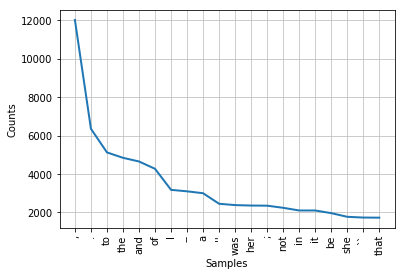

In [18]:
from nltk import Text
import matplotlib.pyplot as plt
text=Text(word_tokenize(emma_raw))
#plot: 각 단어의 사용 빈도를 그래프로 그려줌.
text.plot(20)
plt.show()

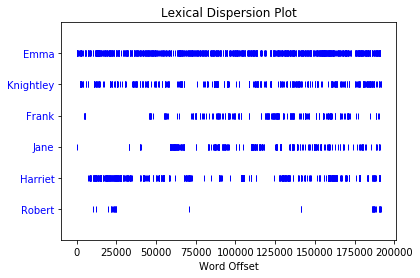

In [20]:
#단어 등장 분포(위치)를 시각화한 그래프
text.dispersion_plot(['Emma', "Knightley", "Frank", "Jane", "Harriet", "Robert"])

#### nltk.FreqDist
- 토큰 출현 횟수와 관련된 시각화에 사용

In [22]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(word_tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)
print(fd_names.N(), fd_names["Emma"], fd_names.freq("Emma"))

6924 829 0.11972848064702483


In [23]:
fd_names.most_common(5)  #출현 횟수가 높은 단어

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

# WordCloud
- 각 단어의 크기가 텍스트데이터의 빈도나 중요성을 나타내도록 하는 데이터 시각화 기법

### 파일불러오기
- r : 읽기모드
- w : 쓰기모드(파일의 처음부터 씀)
- a : 추가모드(파일의 끝에 씀)
- r+ : 읽기와 쓰기모드

In [29]:
text=open('C:/Users/dcng/constitution.txt').read()

#### matplotlib.pyplot.imshow(X, cmap, interpolation ,,,)
 - X : 배열형 / PIL 이미지
 - cmap : str또는 colormap 색상
 - interpolation : 배열의 시각화 속성(none: 스케일 다운/ nearest : 스케일 업)

###  wordcloud.WordCloud (font_path=None, width=400, height=200, margin=2, mask=None, max_words=200, min_font_size=4, stopwords=None, background_color='black', max_font_size=None, colormap=None)

- font_path : 폰트 지정
- margin : 단어들 사이의 간격 지정

#### 기본 wordcloud 생성 wordcloud=WordCloud().generate(text) 실행


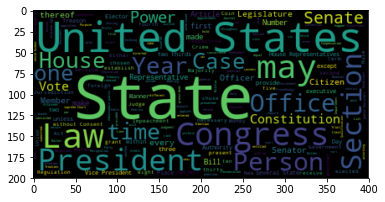

In [31]:
from wordcloud import WordCloud
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

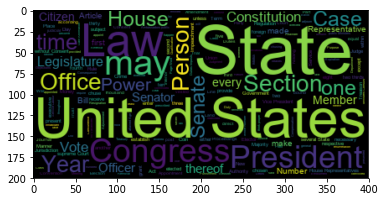

In [32]:
#글꼴지정
wordcloud=WordCloud(font_path='C://Windows/Fonts/Arial.ttf').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

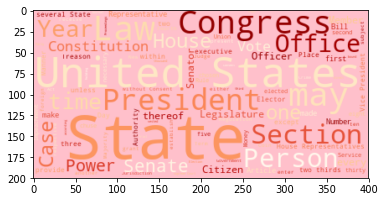

In [33]:
wordcloud=WordCloud(max_words=100, background_color="pink", colormap="OrRd").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

### 이미지 wordcloud 생성 : j.mask

In [37]:
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
stopwords=set(STOPWORDS)

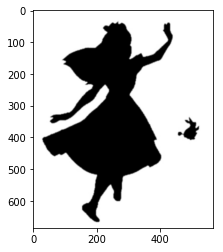

In [38]:
#alice 이미지 열기
text1=open("alice.txt").read()
alice_mask=np.array(Image.open('alice.png'))
stopwords.add("said")
plt.imshow(alice_mask,cmap=plt.cm.gray, interpolation='bilinear')
plt.show()

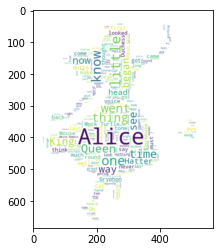

In [39]:
#이미지 안에 wordcloud 만들기
wordcloud=WordCloud(background_color="white",max_words=2000,mask=alice_mask,stopwords=stopwords).generate(text1)
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()